<a href="https://colab.research.google.com/github/bballdave025/job-app-word-freq/blob/polished-5part-presented/Part_03_NLPPresentationJobHunt_DemoWordFreq_p5pp_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Job-Hunt NLP Demo - Part 3

Which demo will also be useful in doing some quick NLP work to see how my résumé's word distribution matches that from job descriptions.

There's a wonderful project out there, [MyBinder](https://mybinder.org), which allows you to interactively run a Jupyter notebook completely online. It's nice to have when you'd like to play with code and see better the outputs that come from running that code. I've had some problems with images going down, but I'm going to work to keep this one up.

The link to the online, interactive notebook - the binder - is at the badge you see right here

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/bballdave025/job-app-word-freq/polished-5part-presented?labpath=Part_03_NLPPresentationJobHunt_DemoWordFreq.ipynb)

<hr/>

## We are calling this version 0.1.003

It's the FamilySearch CJKV jobs applied for in August 2023, but we're splitting it into smaller notebooks. Hopefully, MyBinder can load each more quickly. We'll see how things work with pickling variables between the parts.

<hr/>

## What we are doing in Part 3

First of all, let's give you a MyBinder badge link which specifies the version and the part.

[![Binder](https://github.com/bballdave025/job-app-word-freq/blob/polished-5part-presented/badge_logo_dwb_v_0-1-003_part_3.png?raw=1)](https://mybinder.org/v2/gh/bballdave025/job-app-word-freq/polished-5part-presented?labpath=Part_03_NLPPresentationJobHunt_DemoWordFreq.ipynb)

@TODO : write a few dinglehoppers about what we're doing in Part 3

<hr/>

## Let's start by un-pickle-ing the things we'll need.

In [3]:
import pickle

pickle_filename_2_to_3 = "important_part_2_vars.pkl"

unpickled_array = []

with open(pickle_filename_2_to_3, 'rb') as pfh:
    unpickled_array = pickle.load(pfh)
##endof:  with open ... as pfh # (pickle file handle)

In [4]:
local_job_desc_filenames = unpickled_array[0]
local_job_appl_filenames = unpickled_array[1]
list_of_display_table_desc = unpickled_array[2]
list_of_display_table_appl = unpickled_array[3]
description_word_counts = unpickled_array[4]
application_word_counts = unpickled_array[5]

## Seeing words at certain ranks and comparing description & application

### First, a review of where we've been @TODO

@TODO Review what we've done.

Good things are what we've done.

## The Top-25 From Both

In [5]:
def get_description_word_at_rank(this_rank = 1,
                                 this_desc_fname_idx=0,
                                 do_print_details=False
                                ):
    this_idx = this_rank # the header is index 0
    this_table_to_use = \
      list_of_display_table_desc[this_desc_fname_idx]
    this_word = this_table_to_use[this_rank][0]
    if do_print_details:
        print()
        print(f"  The job description word at rank {this_rank},")
        print(
          ( "  from file:"
           f" '{local_job_desc_filenames[this_desc_fname_idx]}',"
          )
)
        print(f"  is '{this_word}'.")
        print()
    ##endof: if do_print_details

    return this_word
##endof:  get_description_word_at_rank(<params>)

def get_application_word_at_rank(this_rank = 1,
                                 do_print_details=False
                                ):
    this_idx = this_rank # the header is index 0
    this_appl_fname_idx=0
    this_table_to_use = \
      list_of_display_table_appl[this_appl_fname_idx]
    this_word = this_table_to_use[this_rank][0]
    if do_print_details:
        print()
        print(f"  The job application word at rank {this_rank},")
        print(
          ( "  from file:"
           f" '{local_job_appl_filenames[this_appl_fname_idx]}',"
          )
)
        print(f"  is '{this_word}'.")
        print()
    ##endof: if do_print_details

    return this_word
##endof:  get_description_word_at_rank(<params>)

In [6]:
get_description_word_at_rank(1, do_print_details=True);
get_application_word_at_rank(1, do_print_details=True);


  The job description word at rank 1,
  from file: 'desc_CJKV_dev5.txt',
  is 'software'.


  The job application word at rank 1,
  from file: 'res_CJKV.txt',
  is 'python'.



## Time for top-25 histograms (or whatever the discretized version is)

I'm going to go through these histograms one at a time. Basically, I'll compare each of the four job descriptions to my job application.

### Choices for the job description

In [7]:
str_for_choices = f"Choices are any of: {list(range(len(local_job_desc_filenames)))}"
print(str_for_choices.replace(r"[", r"{").replace(r"]", r"}"))

Choices are any of: {0, 1, 2, 3}


Output was most recently

Choices are any of: `{0, 1, 2, 3}`

### Make your choice in the next cell, if you want to see only one description

Otherwise, you should leave this index as `0`, as it's part of my process of going through all four job descriptions.

In [8]:
##  It's your turn to choose which one you want.
##+ Just do this if you are pressed for time and
##+ want to see a certain result; I will be displaying
##+ all four, here.
the_choice_of_description_index = 0

In [9]:
desc_idx_00 = the_choice_of_description_index # smaller variable name.
the_chosen_filename = local_job_desc_filenames[desc_idx_00]
print(f"We will be looking at: {the_chosen_filename}")

We will be looking at: desc_CJKV_dev5.txt


### One value for the job application

This is how I want to structure things in general. Even if I have a résumé and a cover letter and a list of skills from the application and whatever questions they want me to answer, I want to combine them. That is possible in one of the functions above.

In [10]:
#  You can't choose a value for now (or it least doing
#+ so won't give you anything useful).
the_only_application_index_value = 0
appl_idx = the_only_application_index_value
the_only_application_filename = local_job_appl_filenames[appl_idx]

print(f"And the comparison will be to: {the_only_application_filename}")

And the comparison will be to: res_CJKV.txt


### Code for one histogram

In [11]:
import numpy as np
import matplotlib.pyplot as plt

## Next line only for Jupyter notebook.
%matplotlib inline

def get_histo_from_freq_dict(word_count_ordered_dict,
                             n_top_words = 25,
                             do_show_frac_not_count=False,
                             do_show_wd_cnt_or_frac_lists=False,
                             axx=None
                            ):
    '''
    @return  an axis from matplotlab (with the object - histogram - in it)
    '''

    if axx is None:
        fig = plt.figure(figsize=(10, 3))
        axx = fig.add_subplot(111)
    ##endof:  if axx is None

    counts = None
    fractions = None

    if do_show_frac_not_count:
        frac_wd_cnt_list_of_tuples = \
          [ ( k, (v / len(word_count_ordered_dict)) )
                  for k, v in word_count_ordered_dict.items()]
        fractions_pre = [ this_item[1]
                           for this_item in frac_wd_cnt_list_of_tuples ]

        fractions = fractions_pre[:n_top_words]
    else:
        counts_pre = list(word_count_ordered_dict.values())
        counts = counts_pre[:n_top_words]
    ##endof:  if/else do_show_frac_not_count

    words_pre  = list(word_count_ordered_dict.keys())
    words  = words_pre[:n_top_words]

    ## making sure things were working
    if do_show_wd_cnt_or_frac_lists:
        if do_show_frac_not_count:
            print (f"fractions: {fractions}")
        else:
            print(f"counts: {counts}")
        ##endof:  if do_show_frac_not_count
        print(f"words:  {words}")
    ##endof:  if do_show_word_and_count_lists

    x_words_coords = np.arange(len(words))

    if do_show_frac_not_count:
        axx.bar(x_words_coords, fractions, align='center')
    else:
        axx.bar(x_words_coords, counts, align='center')
    ##endof:  if/else do_show_frac_not_count

    axx.set_xticks(x_words_coords)
    axx.set_xticklabels(words, rotation=45, ha='right')

##endof:  get_histo_from_freq_dict

### Let's see a histogram for the job description with word counts

counts: [10, 8, 7, 6, 6, 6, 6, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
words:  ['software', 'work', 'team', 'church', 'technical', 'engineering', 'experience', 'development', 'professional', 'role', 'product', 'programming', '+', 'seek', 'teams', 'job', 'industry', 'practices', 'position', 'areas', 'design', 'support', 'technology', 'provide', 'gospel']


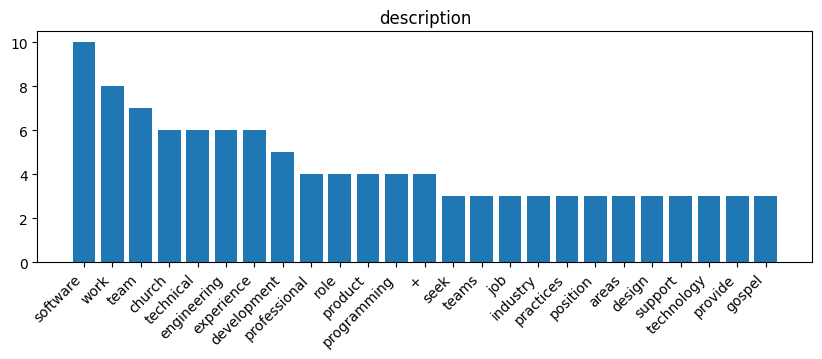

In [12]:
get_histo_from_freq_dict(description_word_counts[desc_idx_00],
                         do_show_wd_cnt_or_frac_lists=True)

plt.title("description")

desc_top_25_hist_fname = "top_25_description_words.png"
plt.savefig(desc_top_25_hist_fname,
            bbox_inches='tight')

plt.show()

### Now, let's see one for the job description with word frequency as a fraction of total words

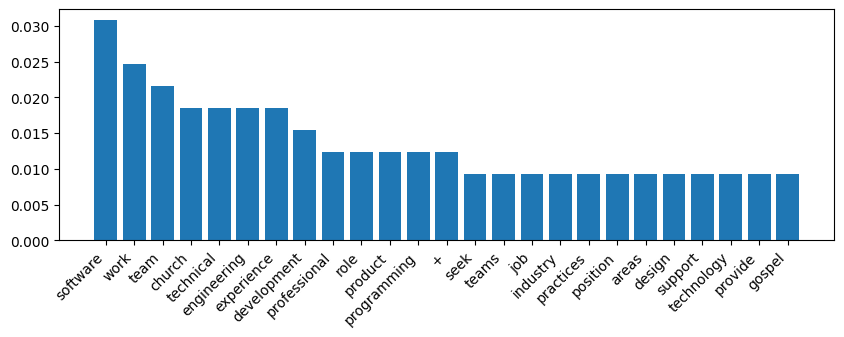

In [13]:
get_histo_from_freq_dict(description_word_counts[desc_idx_00],
                         do_show_frac_not_count=True)

### Here comes the histogram for the job application with word counts

counts: [10, 8, 6, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3]
words:  ['python', 'software', 'java', 'familysearch', 'family', 'programming', 'technical', 'learning', 'team', 'research', 'data', 'science', 'years', 'automated', 'aws', 'bash', '++', 'tools', 'transcription', 'ut', 'work', 'machine', 'records', 'speech', 'experience']


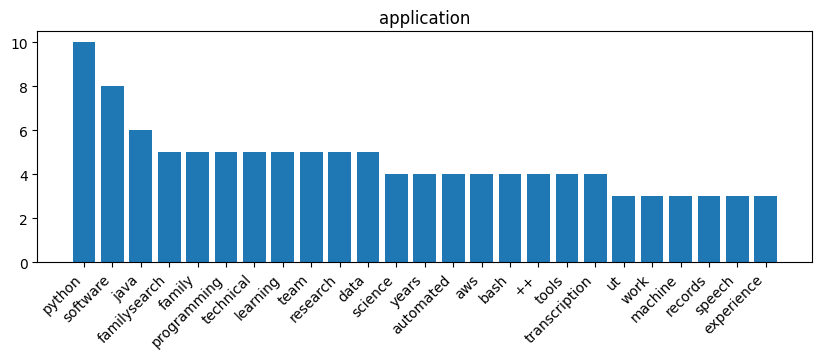

In [14]:
get_histo_from_freq_dict(application_word_counts[appl_idx],
                         do_show_wd_cnt_or_frac_lists=True)

plt.title("application")

appl_top_25_hist_fname = "top_25_application_words.png"
plt.savefig(appl_top_25_hist_fname,
            bbox_inches='tight')

plt.show()

### And the histogram for the job application  with word frequency as a fraction of total words

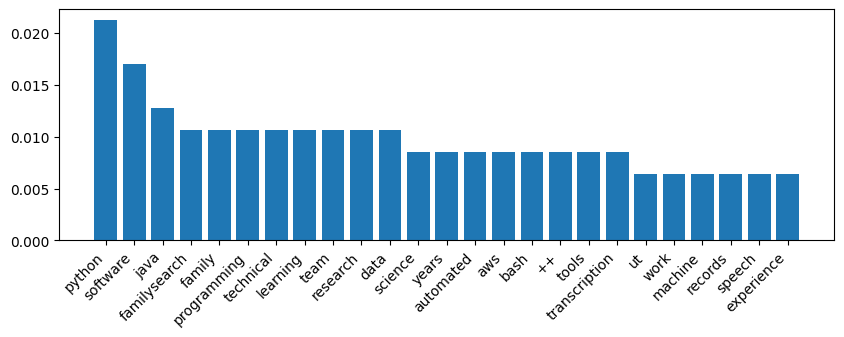

In [15]:
get_histo_from_freq_dict(application_word_counts[appl_idx],
                         do_show_frac_not_count=True)

### Change the img src values and img alt values, then see the histograms together

You might need to double-click on the image to get the html source. You also might need to click on the image (or image-not-found icon) just to make things reload.

In [16]:
print("  img src values for the two images:")
print(f'"{desc_top_25_hist_fname}"')
print(f'"{appl_top_25_hist_fname}"')

print()
print("  img alt values for the two images:")
wd_count_alt_text_1 = '"The histogram for the job description with word frequencies"'
wd_count_alt_text_2 = '"The histogram for the job application with word frequencies"'

print(wd_count_alt_text_1)
print(wd_count_alt_text_2)

  img src values for the two images:
"top_25_description_words.png"
"top_25_application_words.png"

  img alt values for the two images:
"The histogram for the job description with word frequencies"
"The histogram for the job application with word frequencies"


The output histograms, stacked for easier view.

_Remember that you might need to double click on the images to change the img src and img alt values._

<br/>
<div>
  <img src="https://github.com/bballdave025/job-app-word-freq/blob/polished-5part-presented/top_25_description_words.png?raw=1"
       alt="The histogram for the job description with word frequencies"
       width="auto">
</div>
<br/>

<br/>
<div>
  <img src="https://github.com/bballdave025/job-app-word-freq/blob/polished-5part-presented/top_25_application_words.png?raw=1"
       alt="The histogram for the job application with word frequencies"
       width="auto">
</div>
<br/>

Sometimes, I'll grab a printscreen of the above two images and draw green lines between words that match. However, from the time when I allowed the view of the match and three surrounding words, this step hasn't seemed as vital.

If this is going to happen, double click on this cell to see the now-commented HTML, get your saved filename, change the HTML accordingly, and uncomment everything. (HTML Comments start with `<!--` and end with `-->`

<!--
<br/>
<div>
  <img src="word_frequency_plots_w_link_lines.jpg"
       alt="Word matches for the pair of histograms."
       width="100%">
</div>
<br/>
-->

## A better way to compare words in the documents - in Part 4

### Well, for me, it will at least be better to be able to calculate a metric from it,

### and I think the visualizations tell more about how the documents compare

In the next section, rather than using lines between words that match, a messy thing that ends up looking something like the image that follows.

<br/>
<div>
  <img src="https://github.com/bballdave025/job-app-word-freq/blob/polished-5part-presented/first_QandR_word_frequency_plots_w_link_lines.jpg?raw=1"
       alt="Two word-count histograms with lines marking the same word from each document."
       width="300px">
</div>
<br/>


### But first, as usual, it's pickle time.

And the link for the Part 4 MyBinder will be included after the pickling.

In [ ]:
import pickle

pickle_filename_3_to_4 = "important_part_3_vars.pkl"

things_to_pickle_3 = [
    local_job_desc_filenames,
    local_job_appl_filenames,
    description_word_counts,
    application_word_counts,
    list_of_display_table_desc
]

with open(pickle_filename_3_to_4, 'wb') as pfh:
    pickle.dump(things_to_pickle_3, pfh)
##endof:  with open ... as pfh # (pickle file handle)

[Part 4 On GitHub](https://github.com/bballdave025/job-app-word-freq/blob/polished-5part-presented/Part_04_NLPPresentationJobHunt_DemoWordFreq.ipynb)

[Part 4 On MyBinder](https://mybinder.org/v2/gh/bballdave025/job-app-word-freq/polished-5part-presented?labpath=Part_04_NLPPresentationJobHunt_DemoWordFreq.ipynb)

Or, alternatively<strike>/eventually</strike>, use the badge as a link for the MyBinder version.

[![Binder](https://github.com/bballdave025/job-app-word-freq/blob/polished-5part-presented/badge_logo_dwb_v_0-1-003_part_4.png?raw=1)](https://mybinder.org/v2/gh/bballdave025/job-app-word-freq/polished-5part-presented?labpath=Part_04_NLPPresentationJobHunt_DemoWordFreq.ipynb)

<br/><br/>

Continue on to Part 4
<a href="https://colab.research.google.com/drive/1ivJGeQwJ9Jt7bJx66ji6UUz7TsI6dQNa?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To look at other parts in CoLab, some good navigation links are on [my portfolio page](https://github.com/bballdave025/portfolio-resume/blob/main/README.md#do-my-application-and-r%C3%A9sum%C3%A9-match-the-job-description).